# 4.4

## a)

In [1]:
from sympy import *
from sympy.plotting import plot, plot3d

In [2]:
x1, x2 = var('x1 x2', real=True)
alpha = var('alpha', real=True)

dFdx1 = 0.05*x1-alpha*x1*x2
dFdx2 = 0.08*x2-alpha*x1*x2

In [3]:
s = solve([dFdx1, dFdx2], [x1, x2], dict=True)
s

[{x1: 0.0, x2: 0.0}, {x1: 0.08/alpha, x2: 0.05/alpha}]

## b)

<ipython-input-4-354d51ab1863>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


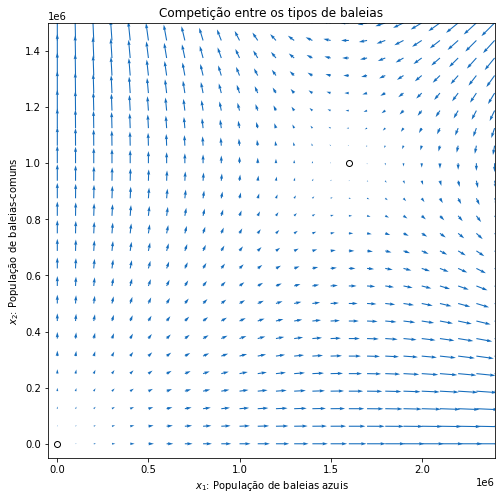

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)

alphagraph = 5e-8

maxx2 = 0.05/alphagraph*1.5
maxx1 = 0.08/alphagraph*1.5

#maxx2 = 400_000
#maxx1 = 150_000

x1graf, x2graf = np.meshgrid(np.linspace(0, maxx1, 25), np.linspace(0, maxx2, 25))

f1 = 0.05*x1graf-alphagraph*x1graf*x2graf
f2 = 0.08*x2graf-alphagraph*x1graf*x2graf

#f1 = 0.05*x1*(1-x1/150000) - alpha*x1*x2
#f2 = 0.08*x2*(1-x2/400000) - alpha*x1*x2

plt.quiver(x1graf, x2graf, f1, f2, color='#156dbd')

plt.scatter([0, 0.08/alphagraph], [0, 0.05/alphagraph], marker='o', edgecolors='black', color='w')

ax = plt.axes()
ax.set_title("Competição entre os tipos de baleias")
ax.set_xlabel('$x_1$: População de baleias azuis')
ax.set_ylabel('$x_2$: População de baleias-comuns')
ax.set_xlim([-50_000, maxx1])
ax.set_ylim([-50_000, maxx2])

plt.show()

## c)

In [5]:
dFdx1x1 = diff(dFdx1, x1)
dFdx2x2 = diff(dFdx2, x2)
dFdx1x2 = diff(dFdx1, x2)
dFdx2x1 = diff(dFdx2, x1)

H = Matrix([
    [dFdx1x1, dFdx1x2],
    [dFdx2x1, dFdx2x2]
])
H

Matrix([
[-alpha*x2 + 0.05,        -alpha*x1],
[       -alpha*x2, -alpha*x1 + 0.08]])

In [6]:
for solucao in s:
    print('Solução: ', solucao)
    display(simplify(H.subs(solucao)))
    print('Autovalores: ')
    display(simplify(H.subs(solucao)).eigenvals())
    print('------------')

Solução:  {x1: 0.0, x2: 0.0}


Matrix([
[0.05,    0],
[   0, 0.08]])

Autovalores: 


{0.0500000000000000: 1, 0.0800000000000000: 1}

------------
Solução:  {x1: 0.08/alpha, x2: 0.05/alpha}


Matrix([
[    0, -0.08],
[-0.05,     0]])

Autovalores: 


{-0.0632455532033676: 1, 0.0632455532033676: 1}

------------
